In [51]:
import pandas as pd
import pickle
    
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
import numpy as np
from numpy.random import randint
from datetime import datetime
import matplotlib.pyplot as plt

In [52]:
data_path = 'C:/Users/H244746/Desktop/Deployment Exercise/archive_original/train.csv'
data = pd.read_csv(data_path)
print('Shape of the data is ', data.shape)
data.head(2)

Shape of the data is  (233154, 41)


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1


In [53]:
data[['PERFORM_CNS_SCORE','NO_OF_INQUIRIES','PRI_OVERDUE_ACCTS','STATE_ID','LTV','EMPLOYMENT_TYPE',
           'VOTERID_FLAG','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','PRI_SANCTIONED_AMOUNT','MANUFACTURER_ID',
           'DATE_OF_BIRTH', 'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']]

,PERFORM_CNS_SCORE,NO_OF_INQUIRIES,PRI_OVERDUE_ACCTS,STATE_ID,LTV,EMPLOYMENT_TYPE,VOTERID_FLAG,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,PRI_SANCTIONED_AMOUNT,MANUFACTURER_ID,DATE_OF_BIRTH,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
0,0,0,0,6,89.55,Salaried,0,0,0,45,01-01-1984,0yrs 0mon,0yrs 0mon
1,598,0,1,6,73.23,Self employed,0,1,50200,45,31-07-1985,1yrs 11mon,1yrs 11mon
2,0,0,0,6,89.63,Self employed,0,0,0,45,24-08-1985,0yrs 0mon,0yrs 0mon
3,305,1,0,6,88.48,Self employed,0,0,0,45,30-12-1993,1yrs 3mon,0yrs 8mon
4,0,1,0,6,88.39,Self employed,0,0,0,45,09-12-1977,0yrs 0mon,0yrs 0mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,735,0,0,6,60.72,Salaried,1,0,416133,48,01-08-1988,3yrs 3mon,1yrs 9mon
233150,825,0,0,6,74.95,Self employed,1,0,0,51,05-12-1988,0yrs 6mon,0yrs 6mon
233151,0,0,0,4,48.45,Salaried,0,0,0,86,01-06-1976,0yrs 0mon,0yrs 0mon
233152,0,0,0,4,49.10,Salaried,0,0,0,86,26-03-1994,0yrs 0mon,0yrs 0mon


In [54]:
data['MANUFACTURER_ID'].unique()

array([ 45,  86,  48,  51, 120,  49, 145,  67, 153, 156, 152], dtype=int64)

In [20]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 'unknown')
cat_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)

In [21]:
preprocessing = [('categorical_imputer', imputer), ('categorical_encoder', cat_encoder)]
pipe = Pipeline(steps = preprocessing)
pipe.fit(data)
pd.DataFrame(pipe.transform(data), columns = data.columns)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,3368.0,9741.0,4810.0,6209.0,30.0,1415.0,0.0,1339.0,29.0,0.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,117984.0,7599.0,10967.0,4577.0,30.0,1415.0,0.0,1397.0,15291.0,1.0,...,56.0,0.0,0.0,1697.0,0.0,0.0,1.0,83.0,130.0,0.0
2,136.0,11616.0,7048.0,6217.0,30.0,1415.0,0.0,1392.0,12078.0,1.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,203886.0,14678.0,11520.0,6102.0,30.0,1415.0,0.0,1396.0,15134.0,1.0,...,56.0,0.0,0.0,31.0,0.0,0.0,0.0,10.0,133.0,1.0
4,119604.0,10988.0,6174.0,6093.0,30.0,1415.0,0.0,1391.0,4642.0,1.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,205812.0,18116.0,38343.0,3326.0,18.0,981.0,1.0,958.0,353.0,0.0,...,56.0,0.0,0.0,3780.0,0.0,0.0,0.0,92.0,215.0,0.0
233150,185814.0,21697.0,36050.0,4749.0,18.0,2145.0,3.0,900.0,2627.0,1.0,...,56.0,0.0,0.0,1271.0,0.0,0.0,0.0,8.0,8.0,0.0
233151,193201.0,2053.0,16575.0,2099.0,38.0,1221.0,5.0,2150.0,251.0,0.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233152,128492.0,2284.0,18614.0,2164.0,38.0,1221.0,5.0,2150.0,12888.0,0.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
target = data['LOAN_DEFAULT']
data = data.drop(columns = 'LOAN_DEFAULT')

In [14]:
# TODO need to go back and make this less hack
# Get numeric feature names
numeric_features = data.select_dtypes('number').columns.to_list()
numeric_features.append('DATE_OF_BIRTH')
numeric_features.append('CREDIT_HISTORY_LENGTH')
numeric_features.append('AVERAGE_ACCT_AGE')
print(len(numeric_features))


# Get categorical feature names
categorical_features = data.select_dtypes('object').columns.to_list()
categorical_features.remove('DATE_OF_BIRTH')
categorical_features.remove('CREDIT_HISTORY_LENGTH')
categorical_features.remove('AVERAGE_ACCT_AGE')
print(len(categorical_features))

37
3


In [5]:
class CalculateCustomerAge(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    # Trivial method to be compatible with Sklearn pipeline
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        
        today = datetime.today().strftime('%Y-%m-%d')
        today = pd.to_datetime(today, format = '%Y-%m-%d')
        
        df['CUSTOMER_AGE'] = ((today - pd.to_datetime(df['DATE_OF_BIRTH'], format = '%d-%m-%Y'))).astype('<m8[Y]')
        
        df = df.drop(columns = 'DATE_OF_BIRTH')
        

        return df

In [6]:
class CalculateCreditHistoryLength(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    # Trivial method to be compatible with Sklearn pipeline
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        
        credit_history_length = df['CREDIT_HISTORY_LENGTH'].str.split(' ', expand = True)
        
        months_credit_history_length = pd.Series(credit_history_length[1].str.extract('(\d+)')[0]).astype(int)
        years_credit_history_length = pd.Series(credit_history_length[0].str.extract('(\d+)')[0]).astype(int) * 12
        
        df['CREDIT_HISTORY_LENGTH'] = months_credit_history_length + years_credit_history_length
        

        return df

In [7]:
class CalculateAverageAccountLength(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    # Trivial method to be compatible with Sklearn pipeline
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        
        average_acct_length = df['AVERAGE_ACCT_AGE'].str.split(' ', expand = True)

        
        months_average_acct_length = pd.Series(average_acct_length[1].str.extract('(\d+)')[0]).astype(int)
        years_average_acct_length = pd.Series(average_acct_length[0].str.extract('(\d+)')[0]).astype(int) * 12
        
        
        df['AVERAGE_ACCT_AGE'] = months_average_acct_length + years_average_acct_length

        return df

In [27]:
# set_config('pandas')

In [15]:



preprocessing = [('categorical_imputer', SimpleImputer(strategy = 'constant', fill_value = 'unknown')),
                ('categorical_encoder', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))]


categorical_transformer = Pipeline(steps = preprocessing)


feature_engineering = [('customer_age_calc', CalculateCustomerAge()),
                       ('credit_history_length_calc', CalculateCreditHistoryLength()),
                      ('average_account_length_calc', CalculateAverageAccountLength())]




# all_steps = preprocessing + feature_engineering

feature_engineering_transformer = Pipeline(steps = feature_engineering)

In [42]:
# feature_engineering_transformer.fit(data)
# feature_engineering_transformer.transform(data)

categorical_transformer.fit(data)

Pipeline(steps=[('categorical_imputer',
                 SimpleImputer(fill_value='unknown', strategy='constant')),
                ('categorical_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformers', categorical_transformer, categorical_features),
        ('feature_engineering', feature_engineering_transformer, numeric_features),
    ])

In [17]:
pipe = Pipeline(steps = [('preprocessor', preprocessor)])

In [18]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_transformers',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('categorical_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['EMPLOYMENT_TYPE',
                                                   'DISBURSAL_DATE',
                                                   'PERFORM_CNS_SCORE_DESCRIPTION']...
                                                   'AA

In [19]:
transformed_data = pipe.transform(data)

In [20]:
transformed_data.shape

(233154, 40)

In [21]:
all_cols = categorical_features + numeric_features + ['CUSTOMER_AGE']
all_cols.remove('DATE_OF_BIRTH')

In [22]:
pd.DataFrame(transformed_data, columns = all_cols)

,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE,CUSTOMER_AGE
0,0.0,2.0,13.0,420825.0,50578.0,58400.0,89.55,67.0,22807.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
1,1.0,68.0,8.0,537409.0,47145.0,65550.0,73.23,67.0,22807.0,45.0,...,0.0,0.0,1991.0,0.0,0.0,1.0,0.0,23.0,23.0,38.0
2,1.0,0.0,13.0,417566.0,53278.0,61360.0,89.63,67.0,22807.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
3,1.0,69.0,11.0,624493.0,57513.0,66113.0,88.48,67.0,22807.0,45.0,...,0.0,0.0,31.0,0.0,0.0,0.0,1.0,15.0,8.0,30.0
4,1.0,68.0,13.0,539055.0,52378.0,60300.0,88.39,67.0,22807.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,0.0,69.0,3.0,626432.0,63213.0,105405.0,60.72,34.0,20700.0,48.0,...,0.0,0.0,4084.0,0.0,0.0,0.0,0.0,39.0,21.0,35.0
233150,1.0,60.0,0.0,606141.0,73651.0,100600.0,74.95,34.0,23775.0,51.0,...,0.0,0.0,1565.0,0.0,0.0,0.0,0.0,6.0,6.0,35.0
233151,0.0,63.0,13.0,613658.0,33484.0,71212.0,48.45,77.0,22186.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
233152,0.0,77.0,13.0,548084.0,34259.0,73286.0,49.10,77.0,22186.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


In [28]:
pipe = create_xgb_classifier_pipeline(categorical_features, numeric_features, all_cols)

In [29]:
pipe.fit(data, target)

Pipeline(steps=[('preprocessor_pipe',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('categorical_transformers',
                                                                   Pipeline(steps=[('categorical_imputer',
                                                                                    SimpleImputer(fill_value='unknown',
                                                                                                  strategy='constant')),
                                                                                   ('ordinal_encoder',
                                                                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                   unknown_value=-1))]),
                                                                   ['EMPLOYMENT_TYPE',
                       

In [26]:
def create_xgb_classifier_pipeline(categorical_features, numeric_features, all_cols, seed=42):
  
    preprocessing = [('categorical_imputer', SimpleImputer(strategy = 'constant', fill_value = 'unknown')),
                ('ordinal_encoder', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))]


    categorical_transformer = Pipeline(steps = preprocessing)


    feature_engineering = [('customer_age_calc', CalculateCustomerAge()),
                           ('credit_history_length_calc', CalculateCreditHistoryLength()),
                          ('average_account_length_calc', CalculateAverageAccountLength())]






    feature_engineering_transformer = Pipeline(steps = feature_engineering)
    
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformers', categorical_transformer, categorical_features),
        ('feature_engineering', feature_engineering_transformer, numeric_features),
    ])

    
    pipe_preprocessor = Pipeline(steps = [('preprocessor', preprocessor)])
    
    pipe_xgb = Pipeline(steps = [('preprocessor_pipe', pipe_preprocessor),('clf',  XGBClassifier(random_state = seed))])
    

  
    return pipe_xgb

In [47]:
def train_xgb_model(seed=42):

    
    data_path = 'C:/Users/H244746/Desktop/Deployment Exercise/archive_original/train.csv'
    data = pd.read_csv(data_path)

    
    y = data['LOAN_DEFAULT']
    X = data.drop(columns = ['UNIQUEID', 'LOAN_DEFAULT'])
    
    X = X[['PERFORM_CNS_SCORE',
 'NO_OF_INQUIRIES',
 'PRI_OVERDUE_ACCTS',
 'STATE_ID',
 'LTV',
 'EMPLOYMENT_TYPE',
 'VOTERID_FLAG',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'PRI_SANCTIONED_AMOUNT',
 'MANUFACTURER_ID', 'DATE_OF_BIRTH', 'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']]

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = seed)

    # downsample
    n_minority = (y_train == 1).sum()
    y_train_down = y_train[y_train == 0].sample(n_minority, replace=False, random_state = seed)
    X_train_down = X_train.loc[y_train_down.index,:]

    minority_index = y_train[y_train == 1].index.to_list()
    minority_index = minority_index + y_train_down.index.to_list()


    X_train = X_train.loc[minority_index,:]
    y_train = y_train.loc[minority_index]
    
    
    print(y_train.value_counts())
    
    
    # TODO need to go back and make this less hack
    # Get numeric feature names
    numeric_features = X_train.select_dtypes('number').columns.to_list()
    numeric_features.append('DATE_OF_BIRTH')
    numeric_features.append('CREDIT_HISTORY_LENGTH')
    numeric_features.append('AVERAGE_ACCT_AGE')
    print(len(numeric_features))


    # Get categorical feature names
    categorical_features = X_train.select_dtypes('object').columns.to_list()
    categorical_features.remove('DATE_OF_BIRTH')
    categorical_features.remove('CREDIT_HISTORY_LENGTH')
    categorical_features.remove('AVERAGE_ACCT_AGE')
    print(len(categorical_features))
    
    
    all_cols = categorical_features + numeric_features + ['CUSTOMER_AGE']
    all_cols.remove('DATE_OF_BIRTH')



    # Create pipeline
    pipe = create_xgb_classifier_pipeline(categorical_features = categorical_features, numeric_features = numeric_features, all_cols = all_cols, seed = seed)


    # Fit pipeline
    pipe.fit(X_train, y_train)


    # Make predictions on test set and generate confusion matrix
    y_preds = pipe.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)


    # Accuracy of model
    train_accuracy = accuracy_score(y_train, pipe.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_preds)
    
    train_recall = recall_score(y_train, pipe.predict(X_train))
    test_recall = recall_score(y_test, y_preds)

    performance_metrics = {'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy, 'train_recall':train_recall, 'test_recall':test_recall}
    print(performance_metrics)
    


#     performance_path = 'C:\\Users\\H244746\\Desktop\\Deployment Exercise\\performance_metrics\\loan_default_classifier_performance.sav'
#     with open(performance_path, 'wb') as handle:
#         pickle.dump(performance_metrics, handle)


    
    
    
#     pipeline_path = 'C:\\Users\\H244746\\Desktop\\Deployment Exercise\\models\\loan_default_pipeline_classifier.sav'
#     with open(pipeline_path, 'wb') as handle:
#         pickle.dump(pipe, handle)
    
    

    # Feature importance
    feat_imp = pd.DataFrame()
    feat_imp['feature'] = all_cols
    feat_imp['importance'] = pipe.named_steps['clf'].feature_importances_



    feat_imp = feat_imp.sort_values('importance', ascending = False)
    fix, ax = plt.subplots(1,1, figsize = (7,5))
    ax.bar(feat_imp['feature'].str[:8], feat_imp['importance'])
    ax.set_ylabel('Importance')
    ax.set_title('Feature Importances')
    plt.xticks(rotation = 45)
    plt.show()




#     mlflow.sklearn.log_model(pipe,'breast_cancer_model', input_example = input_example, signature = signature)
#     mlflow.log_metric('test_accuracy', test_accuracy)
#     mlflow.log_params(pipe.named_steps['clf'].get_params())
#     mlflow.log_figure(cm.figure_, 'test_confusion_matrix.png')
#     mlflow.log_figure(fix, 'feature_importance.png')

    return X_train, y_train, feat_imp


1    40457
0    40457
Name: LOAN_DEFAULT, dtype: int64
12
1
{'train_accuracy': 0.6665966334626888, 'test_accuracy': 0.5801290986682679, 'train_recall': 0.7056133672788393, 'test_recall': 0.6304904471144377}


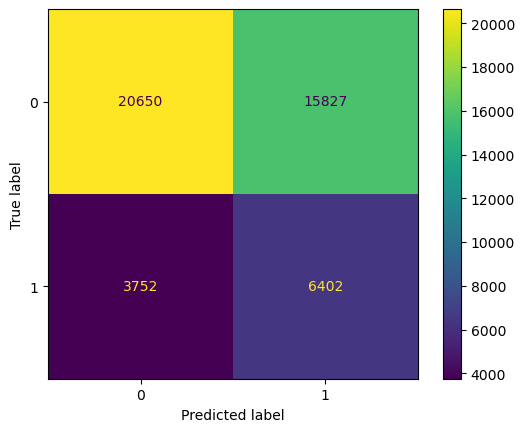

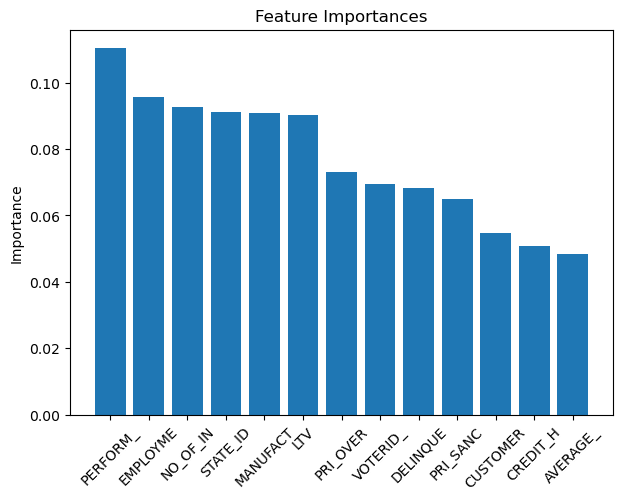

In [48]:
X_train, y_train, feat_imp = train_xgb_model()

In [50]:
feat_imp['feature']

1                       PERFORM_CNS_SCORE
0                         EMPLOYMENT_TYPE
2                         NO_OF_INQUIRIES
4                                STATE_ID
9                         MANUFACTURER_ID
5                                     LTV
3                       PRI_OVERDUE_ACCTS
6                            VOTERID_FLAG
7     DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
8                   PRI_SANCTIONED_AMOUNT
12                           CUSTOMER_AGE
10                  CREDIT_HISTORY_LENGTH
11                       AVERAGE_ACCT_AGE
Name: feature, dtype: object

In [173]:
performance_path = 'C:\\Users\\H244746\\Desktop\\Deployment Exercise\\performance_metrics\\loan_default_classifier_performance.sav'
with open(performance_path, 'rb') as handle:
    b = pickle.load(handle)

In [174]:
b

{'train_accuracy': 0.7112119039968361,
 'test_accuracy': 0.5997297934850206,
 'train_recall': 0.7402921620485948,
 'test_recall': 0.6359070317116408}

In [177]:
pipeline_path = 'C:\\Users\\H244746\\Desktop\\Deployment Exercise\\models\\loan_default_pipeline_classifier.sav'
with open(pipeline_path, 'rb') as handle:
    b = pickle.load(handle)